In [1]:
# Importing the libraries and reading CSV File
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
gene_data=pd.read_csv("pro100.csv",index_col=0,usecols=[0,1,3,4])
gene_data

,Gene,NMSE,Decision
S.No,,,
1,12,0.070512,1
2,12,0.062710,1
3,16,0.040549,1
4,16,0.062347,1
5,16,0.052702,1
...,...,...,...
196,16,0.101000,0
197,23,0.069755,1
198,23,0.069346,1


In [2]:
#Inputs
X =gene_data.drop(columns=['Decision'])
print(X)

      Gene      NMSE
S.No                
1       12  0.070512
2       12  0.062710
3       16  0.040549
4       16  0.062347
5       16  0.052702
...    ...       ...
196     16  0.101000
197     23  0.069755
198     23  0.069346
199     23  0.069464
200    106  0.072454

[200 rows x 2 columns]


In [3]:
gene_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gene      200 non-null    int64  
 1   NMSE      200 non-null    float64
 2   Decision  200 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.2 KB


In [4]:
gene_data['Decision'].value_counts()

1    140
0     60
Name: Decision, dtype: int64

In [5]:
#Outputs
y= gene_data['Decision']
print(y)

S.No
1      1
2      1
3      1
4      1
5      1
      ..
196    0
197    1
198    1
199    1
200    1
Name: Decision, Length: 200, dtype: int64


In [3]:
#........Representing Gene Organism in numbers.........
character = input("Enter the organism's first two letters in Uppercase:")
U=character.upper()
data = {"AB":12,"AF": 16, "JF": 106, "DM": 413, "DL": 412,"KF": 116, "JN": 1014, "HQ": 817, "M": 13,
        "EU": 521, "U": 21, "S":19, "BC":23, "AY":125, "NM":1413,"BT":220 ,"AK":111}
if U in data:
    print(f"The GENE is {data[U]}")
else:
    print("INVALID INPUT")

Enter the organism's first two letters in Uppercase:ab
The GENE is 12


In [23]:
#Training and Testing the Dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
predicition=model.predict(X_test)
predicition

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [22]:
# prediction of type of gene
if(predicition==1):
    print("The given Gene is Diseased")
else:
    print("The given Gene is Healthy")

The given Gene is Diseased


In [13]:
#Accuracy 
score=accuracy_score(y_test,predicition)
print(f"Accuracy: {score}")

Accuracy: 0.975


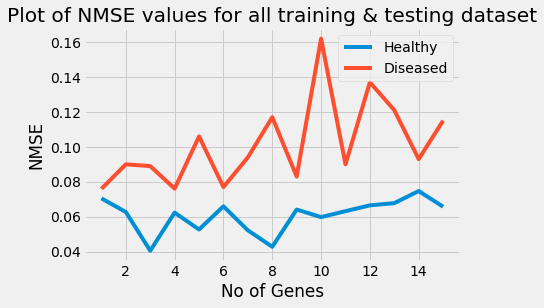

In [14]:
#Ploting the graph
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
d=[0.070512,0.06271,0.040549,0.062347,0.052702,0.065965,0.052226,0.042809,0.064111,0.059784,0.063175,0.066521
,0.067773,0.074711,0.06575]
g1=list(range(1,16))
h=[0.076,0.09,0.089,0.0761,0.106,0.077,0.094,0.117,0.083,0.162,0.09,0.137,0.121,0.093,0.115]
g2=list(range(1,16))
plt.plot(g2,d)
plt.plot(g1,h)
plt.xlabel('No of Genes')
plt.ylabel('NMSE')
plt.title('Plot of NMSE values for all training & testing dataset')
plt.legend(['Healthy','Diseased'])
plt.savefig('gra.png')
plt.show()